# LeNet

ps：

pip install d2l

pip install matplotlib==3.0.0

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

1. 定义网络

In [2]:
class Reshape(torch.nn.Module):

  def forward(self, x):
    return x.reshape(-1, 1, 28, 28)

In [3]:
net = nn.Sequential(
    Reshape(),
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16*5*5, 120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10),
)

In [4]:
X = torch.rand(size=(1,1,28,28), dtype=torch.float32)
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__, 'output: \t', X.shape)

Reshape output: 	 torch.Size([1, 1, 28, 28])
Conv2d output: 	 torch.Size([1, 6, 28, 28])
Sigmoid output: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output: 	 torch.Size([1, 6, 14, 14])
Conv2d output: 	 torch.Size([1, 16, 10, 10])
Sigmoid output: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output: 	 torch.Size([1, 16, 5, 5])
Flatten output: 	 torch.Size([1, 400])
Linear output: 	 torch.Size([1, 120])
Sigmoid output: 	 torch.Size([1, 120])
Linear output: 	 torch.Size([1, 84])
Sigmoid output: 	 torch.Size([1, 84])
Linear output: 	 torch.Size([1, 10])


2. 载入数据集

In [5]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


3. 初始化权重

In [6]:
def init_weights(m):
  if type(m) in [nn.Linear, nn.Conv2d]:
    nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)

Sequential(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=400, out_features=120, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=84, out_features=10, bias=True)
)

4. 定义loss

In [7]:
loss = nn.CrossEntropyLoss()

5. 定义优化器

In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

6. Training and Prediction

In [9]:
def acc(X,y,net):
  p_predict = net(X)
  y_predict = torch.argmax(p_predict,axis=1)
  output = y_predict - y
  right_pre = len(output[output==0])
  right_accu = right_pre/len(output)
  return right_accu

In [10]:
epochs = 30
train_accu_history = []
test_accu_history = []
train_loss = []


for epoch in range(epochs):

  net.train()

  for X,y in train_iter:

    l = loss(net(X), y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

  l = loss(net(X), y)
  train_loss.append(l.detach())

  net.eval()
  train_batch = 0
  train_accu = 0
  
  test_batch = 0
  test_accu = 0
  
  for X_train,y_train in train_iter:

    train_accu += acc(X_train, y_train, net)
    train_batch += 1
    train_avg_acc = train_accu/train_batch
  train_accu_history.append(train_avg_acc)

  for X_test,y_test in test_iter:

    test_accu += acc(X_test, y_test, net)
    test_batch += 1
    avg_acc = test_accu/test_batch
  test_accu_history.append(avg_acc)


  print(f'epoch {epoch + 1}, loss {l:f}, train_accu {train_avg_acc:f}, test_accu {avg_acc:f}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1, loss 2.260278, train_accu 0.100066, test_accu 0.099121
epoch 2, loss 2.269454, train_accu 0.099983, test_accu 0.097656
epoch 3, loss 2.277193, train_accu 0.099956, test_accu 0.099121
epoch 4, loss 2.290595, train_accu 0.100011, test_accu 0.102051
epoch 5, loss 2.292321, train_accu 0.179000, test_accu 0.184277
epoch 6, loss 2.274071, train_accu 0.185018, test_accu 0.186035
epoch 7, loss 2.129006, train_accu 0.253502, test_accu 0.256250
epoch 8, loss 1.465359, train_accu 0.476114, test_accu 0.481934
epoch 9, loss 1.135197, train_accu 0.553219, test_accu 0.556055
epoch 10, loss 1.000132, train_accu 0.600909, test_accu 0.601953
epoch 11, loss 1.035856, train_accu 0.651008, test_accu 0.651563
epoch 12, loss 0.872904, train_accu 0.661686, test_accu 0.658203
epoch 13, loss 0.836817, train_accu 0.675061, test_accu 0.668164
epoch 14, loss 0.799353, train_accu 0.694210, test_accu 0.692676
epoch 15, loss 0.795512, train_accu 0.700859, test_accu 0.698438
epoch 16, loss 0.787334, train_acc

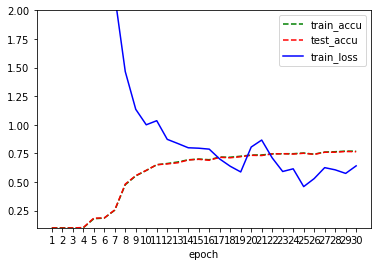

In [12]:
import matplotlib.pyplot as plt
x_label_value = [str(i) for i in range(1,epochs+1)]
plt.plot(x_label_value, train_accu_history, label='train_accu', color='g', linestyle='dashed')
plt.plot(x_label_value, test_accu_history, label='test_accu', color='r', linestyle='dashed')
plt.plot(x_label_value, train_loss, label='train_loss', color='b')
plt.xlabel('epoch')
plt.ylim(0.1,2)
plt.legend()
plt.show()